# Resampling Methods

The goal of predictive modeling is to create models that make good predictions on new data. We
don't have access to this new data at the time of training, so we must use statistical methods to estimate the performance of a model on new data. This class of methods are called resampling methods, as they resampling your available training data.

------

# Theory

## Exercise 1

We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is $(1 − 1/n) ^ n$.

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample

(f)When n = 10,000, what is the probability that the jth observation
is in the bootstrap sample?


a) p = (n-1)/n  = 1 - (1/n)
b) p = (n-1)/n  = 1 - (1/n)
c) (1-1/n)*...*(1-1/n) = (1-1/n)^n
d) 1 - p^5 = 1 - (1-1/n)^5 = 1 - (1-1/5)^5 = 0.672
e) 1 - (1-1/100)^100 = 0.634
f) 1 - (1-1/10000)^10000 = 0.632

## Exercise 2

We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:
    
    i. The validation set approach?
    
    ii. LOOCV?

a) K fold is implemented by 1) splitting the data into k folds, 2) holding one fold out and fitting the model k times, 3) test on held out fold, 4) getting the mean of the all test performance

b) i. validation might lead to overfitting
ii. LOOCV might have too similar results
k fold is the most unbiased but could take longer to process

## Exercise 3

Suppose that we use some statistical learning method to make a prediction
for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

Could use any of the resampling methods to estimate standard deviation of the prediction.

# Practical

## Exercise - Credit Card Default Data Set

We previously used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach.

**Task** - Fit a logistic regression model that uses `income` and `balance` to predict `default`. Compare the error of the scikit-learn and statsmodel implementations without the validation set.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
default = pd.read_csv('default.csv')
default.head()

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


In [4]:
default['student_new'] = pd.get_dummies(default['student'], drop_first=True).values.astype('int')

In [6]:
default['default_new'] = pd.get_dummies(default['default'], drop_first=True).values.astype('int')

In [7]:
default.head()

,default,student,balance,income,student_new,default_new
0,0,No,729.526495,44361.625074,0,0
1,0,Yes,817.180407,12106.134700,1,0
2,0,No,1073.549164,31767.138947,0,0
3,0,No,529.250605,35704.493935,0,0
4,0,No,785.655883,38463.495879,0,0


In [9]:
x = default[['balance', 'income']]
y = default['default_new']

In [15]:
lr = LogisticRegression()
lr.fit(x, y)
lr.intercept_, lr.coef_

(array([ -1.94164125e-06]), array([[ 0.00040756, -0.00012588]]))

In [18]:
result = smf.logit(formula='default_new ~ balance + income', data=default).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_new   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Apr 2017   Pseudo R-squ.:                  0.4594
Time:                        16:45:32   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
(lr.predict(x) == y).mean()

0.96640000000000004

In [21]:
((result.predict(x) > .5) == y).mean()

0.97370000000000001

**Task** - Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

1. Split the sample set into a training set and a validation set.
2. Fit a multiple logistic regression model using only the training observations.
3. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.
4. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
5. Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.
6. Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.intercept_, lr.coef_

(array([-0.00039398]), array([[ 0.00045546, -0.00013151]]))

In [24]:
x_train_sm = x_train.join(y_train)

In [25]:
result = smf.logit(formula='default_new ~ balance + income', data=x_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.076630
         Iterations 10


In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_new   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Apr 2017   Pseudo R-squ.:                  0.4537
Time:                        16:49:03   Log-Likelihood:                -574.73
converged:                       True   LL-Null:                       -1052.0
                                        LLR p-value:                5.531e-208
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3110      0.502    -22.524      0.000     -12.295     -10.327
balance        0.0056      0.000     21.171      0.000       0.005       0.006
income      1.619e-05   5.86e-06      2.765      0.006    4.71e-06    2.77e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [27]:
(lr.predict(x_test) == y_test).mean(), ((result.predict(x_test) > .5) == y_test).mean()

(0.96120000000000005, 0.97119999999999995)

In [29]:
1 - (lr.predict(x_test) == y_test).mean()

0.038799999999999946

In [30]:
lr = LogisticRegression()

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    lr.fit(x_train, y_train)
    
    x_train_sm = x_train.join(y_train)
    result = smf.logit(formula='default_new ~ balance + income', data=x_train_sm).fit()
    print((lr.predict(x_test) == y_test).mean(), ((result.predict(x_test) > .5) == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.076630
         Iterations 10
0.9612 0.9712
Optimization terminated successfully.
         Current function value: 0.078638
         Iterations 10
0.9684 0.9748
Optimization terminated successfully.
         Current function value: 0.080776
         Iterations 10
0.9728 0.9744


In [31]:
x = default[['balance', 'income', 'student_new']]
y = default['default_new']

lr = LogisticRegression()

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    lr.fit(x_train, y_train)
    
    x_train_sm = x_train.join(y_train)
    result = smf.logit(formula='default_new ~ balance + income', data=x_train_sm).fit()
    print((lr.predict(x_test) == y_test).mean(), ((result.predict(x_test) > .5) == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.076630
         Iterations 10
0.9612 0.9712
Optimization terminated successfully.
         Current function value: 0.078638
         Iterations 10
0.9684 0.9748
Optimization terminated successfully.
         Current function value: 0.080776
         Iterations 10
0.9728 0.9744


**Task** - Compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients by using the bootrap and logistic regression functions.

1. Use the summary() method on the logistic regression statsmodel instance.
2. Implement your own bootstrap method and run the model 100 times
3. Comment on the estimated standard errors obtained using statsmodels and your bootstrap.

In [32]:
result = smf.logit(formula='default_new ~ balance + income', data=default).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_new   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Apr 2017   Pseudo R-squ.:                  0.4594
Time:                        16:55:57   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
result.params, result.bse

(Intercept   -11.540468
 balance       0.005647
 income        0.000021
 dtype: float64, Intercept    0.434772
 balance      0.000227
 income       0.000005
 dtype: float64)

In [33]:
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])

for i in range(100):
    default_sample = default.sample(len(default), replace=True)
    result_sample = smf.logit(formula='default_new ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(result_sample.params, ignore_index=True)a

In [34]:
df_params.mean(), df_params.std()

(Intercept   -11.572945
 balance       0.005654
 income        0.000021
 dtype: float64, Intercept    0.432680
 balance      0.000221
 income       0.000005
 dtype: float64)

### Exercise 5 -  Stock Market Data

**Task** - We will compute the LOOCV error for a simple logistic regression model on the `SMarket` data set.  

1. Read in the stock market data set
2. Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.
3. Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using all but the first observation.
4. Use the model from (3) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(\mbox{direction = Up} | Lag1,Lag2 ) > 0.5$. Was this observation correctly classified?
5. Write a loop from `i=1` to `i=n`, where n is the number of observations in the data set, that performs each of the following steps:
    - Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.
    - Compute the posterior probability of the market moving up for the ith observation.
    - Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
    - Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.
6. Take the average of the n numbers obtained in (5) in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [36]:
stock = pd.read_csv('SMarket.csv', index_col=0)
stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [39]:
stock['Direction_Up'] = (stock['Direction'] == 'Up') * 1
x = stock[['Lag1', 'Lag2']]
y = stock['Direction_Up']

In [40]:
lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
lr.intercept_, lr.coef_

(array([ 0.07401017]), array([[-0.07132639, -0.04437839]]))

In [42]:
(lr.predict(x) == y).mean()

0.52800000000000002

In [43]:
lr.fit(x.iloc[1:], y.iloc[1:])
lr.intercept_, lr.coef_, (lr.predict(x) == y).mean()

(array([ 0.07245433]),
 array([[-0.07177457, -0.04415179]]),
 0.52800000000000002)

In [44]:
lr.predict(x)[0], y.iloc[0]

(1, 1)

In [45]:
errors = []

for i in range(i, len(x)):
    temp_x = x.drop(i, axis=0)
    temp_y = y.drop(i, axis=0)
    lr.fit(temp_x, temp_y)
    errors.append(int(lr.predict(x)[i-1] != y.iloc[i-1]))

In [46]:
np.mean(errors)

0.48132059079061684

### Exercise 6 - Simulated Data

In [47]:
np.random.seed(0)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

**Task** - We will now perform cross-validation on a simulated data set.

1. Create a scatterplot of X against Y. Comment on what you find.
2. Compute the LOOCV errors that result from fitting the following four models using least squares: Linear, Quadratic, Cubic and Quartic.
3. Repeat (2) using another random seed, and report your results. Are your results the same as what you got in (2)? Why?
4. Which of the models in (3) had the smallest LOOCV error? Is this what you expected? Explain your answer.
5. Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (2) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [48]:
y.shape

(100,)

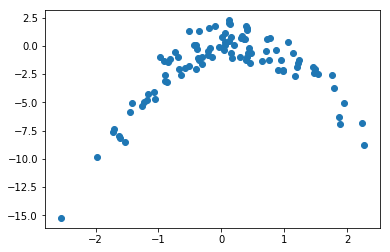

In [49]:
plt.scatter(x, y)

In [51]:
df = pd.DataFrame(np.array([np.ones(len(x)), x, x**2, x**3, x**4, y]).T,
                 columns = ['b0', 'x', 'x2', 'x3', 'x4', 'y'])
df.head()

,b0,x,x2,x3,x4,y
0,1.0,1.764052,3.111881,5.489520,9.683801,-2.576558
1,1.0,0.400157,0.160126,0.064075,0.025640,-1.267853
2,1.0,0.978738,0.957928,0.937561,0.917626,-2.207603
3,1.0,2.240893,5.021602,11.252875,25.216490,-6.832915
4,1.0,1.867558,3.487773,6.513618,12.164559,-6.281111


In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
x = df.iloc[:, :5]
y = df['y']

model = LinearRegression()
errors = np.zeros((len(x), 4))

for i in range(len(x)):
    leave_out = ~x.index.isin([i])
    
    for j in range(4):
        model.fit(x.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([x.iloc[i, :j+2]]) - y [i]) **2

In [56]:
errors.mean(axis=0)

array([ 8.88820583,  1.11615319,  1.16222588,  1.14714794])

In [59]:
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e


df = pd.DataFrame(np.array([np.ones(len(x)), x, x**2, x**3, x**4, y]).T,
                 columns = ['b0', 'x', 'x2', 'x3', 'x4', 'y'])
x = df.iloc[:, :5]
y = df['y']

model = LinearRegression()
errors = np.zeros((len(x), 4))

for i in range(len(x)):
    leave_out = ~x.index.isin([i])
    
    for j in range(4):
        model.fit(x.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([x.iloc[i, :j+2]]) - y [i]) **2
errors.mean(axis=0)

array([ 11.61020827,   1.26528394,   1.28204182,   1.31659158])

In [60]:
import statsmodels.api as sm

y = df['y']
x = sm.add_constant(df[['x', 'x2', 'x3', 'x4']])
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     262.4
Date:                Thu, 20 Apr 2017   Prob (F-statistic):           2.01e-50
Time:                        17:11:55   Log-Likelihood:                -150.85
No. Observations:                 100   AIC:                             311.7
Df Residuals:                      95   BIC:                             324.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2589      0.160      1.621      0.108      -0.058       0.576
x              1.0351      0.213      4.857      0.000       0.612       1.458
x2            -2.1130      0.217     -9.728      0.000      -2.544      -1.682
x3            -0.0189      0.064     -0.294      0.769      -0.146       0.109
x4            -0.0043      0.043     -0.100      0.921      -0.090       0.082
==============================================================================
Omnibus:                        9.124   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.158
Skew:                           0.535   Prob(JB):                      0.00623
Kurtosis:                       4.138   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 7 - Boston Housing Data

**Task** - We will now consider the `Boston` housing data set that we have used previously.

1. Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{\mu}$.
2. Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.
3. Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (2)?
4. Based on your bootstrap estimate from (3), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained from a t.test on `medv`.
5. Based on this data set, provide an estimate, $\hat{\mu}$ med, for the median value of `medv` in the population.
6. We now would like to estimate the standard error of $\hat{\mu}$ med. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.
7. Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston suburbs. Call this quantity $\hat{\mu}$ 0.1.
8. Use the bootstrap to estimate the standard error of $\hat{\mu}$ 0.1. Comment on your findings.

In [61]:
boston = pd.read_csv('Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
mu = boston['medv'].mean()
print(mu)

22.5328063241


In [63]:
se_mu = boston['medv'].std() / np.sqrt(len(boston))
print(se_mu)

0.408861147498


In [65]:
np.random.seed(0)
means = [boston['medv'].sample(n=len(boston), replace=True).mean() for i in range(1000)]
np.std(means)

0.41163337514478704

In [66]:
se = np.std(means)
boston['medv'].mean() - (2*se), boston['medv'].mean() + (2*se)

(21.709539573821104, 23.35607307440025)

In [67]:
import scipy.stats as st
st.t.interval(0.95, len(boston['medv']) - 1, loc=np.mean(boston['medv']), scale=st.sem(boston['medv']))

(21.729528014578595, 23.336084633642759)

In [68]:
boston['medv'].median()

21.2

In [69]:
medians = [boston['medv'].sample(n=len(boston), replace=True).median() for i in range(1000)]

In [70]:
print('Average Median ', np.mean(medians))
print('Standard Error ', np.std(medians))

Average Median  21.19675
Standard Error  0.375868244868


In [71]:
np.random.seed(1)

In [72]:
boston['medv'].quantile(.1)

12.75

In [73]:
np.random.seed(1)
quantile_10 = [boston['medv'].sample(n=len(boston), replace=True).quantile(.1) for i in range(1000)]

In [74]:
np.mean(quantile_10), np.std(quantile_10)

(12.7704, 0.48836343024432116)